# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

In [2]:
# seth a path
path = '/Users/aida/Desktop/Careerfoundry/python/Instacart Basket Analysis'

In [3]:
# Import most up-to-date project data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check table column names
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'Unnamed: 0.1', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

In [5]:
# Creating list of states into Northeast Region
Northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [6]:
# Creating list of states into Midwest Region
Midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [7]:
# Creating list of states into South Region
South_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [8]:
# Creating list of states into West Region
West_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Set the Region for each state in the table
instacart.loc[instacart['state'].isin(Northeast_states), 'Region'] = 'Northeast'

In [10]:
instacart.loc[instacart['state'].isin(Midwest_states), 'Region'] = 'Midwest'

In [11]:
instacart.loc[instacart['state'].isin(South_states), 'Region'] = 'South'

In [12]:
instacart.loc[instacart['state'].isin(West_states), 'Region'] = 'West'

In [13]:
# Find value counts for each region to check for assignment completion
instacart['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [14]:
# Create table for region and spending flag
region_spending = pd.crosstab(instacart['Region'], instacart['spender_flag'], dropna = False)

In [15]:
# View table
region_spending

spender_flag,High_spender,Low_spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [16]:
# Create low-activity flag
instacart.loc[instacart['order_number'] < 5, 'low_spender'] = 'Yes'

In [17]:
instacart.loc[instacart['order_number'] >= 5, 'low_spender'] = 'No'

In [18]:
# Create table including only mid to high_activity customers
mid_high_spender = instacart[instacart['low_spender'] == 'No']

In [19]:
# Compare shapes of riginal and new table
instacart.shape

(32404859, 37)

In [20]:
mid_high_spender.shape

(24414877, 37)

In [21]:
# Check that new table has no missing values
instacart['low_spender'].value_counts(dropna = False)

low_spender
No     24414877
Yes     7989982
Name: count, dtype: int64

In [22]:
# Save mid to high_activity pickle file
mid_high_spender.to_pickle( 'mid_high_spender.pkl')

In [23]:
# Set the default flag to regular
instacart['shopping_behavior'] = 'Regular'

In [24]:
# Set the flag to 'Early Bird' for orders between 5am and 8am
instacart.loc[instacart['order_hour_of_day'].between(5, 8), 'shopping_behavior'] = "Early Bird"

In [25]:
# Set the flag to 'Night Owl' for orders after 8pm and before 5am
instacart.loc[(instacart['order_hour_of_day'] >= 21) | (instacart['order_hour_of_day'] < 5), 'shopping_behavior'] = 'Night Owl'

In [26]:
# Check for assignment completion
instacart['shopping_behavior'].value_counts(dropna = False)

shopping_behavior
Regular       27076688
Early Bird     2987626
Night Owl      2340545
Name: count, dtype: int64

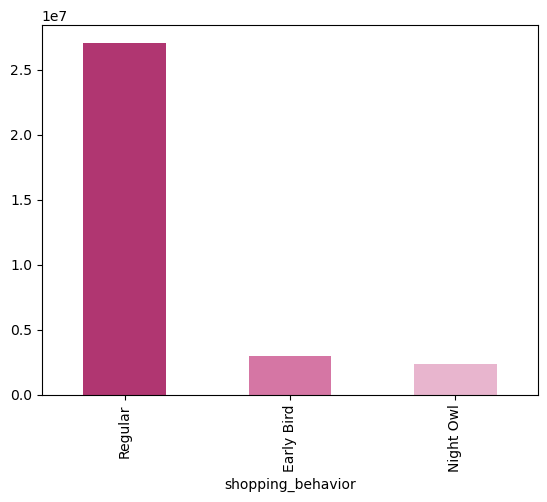

In [27]:
# Create bar graph for shopping behavior'#b03671', '#d576a4','#e8b5ce'
shopping_behavior_bar = instacart['shopping_behavior'].value_counts().plot.bar(color =['#b03671', '#d576a4','#e8b5ce'])

In [28]:
# Create pie chart for shopping behavior
# Create table of shopping behavior counts
behavior_counts = instacart['shopping_behavior'].value_counts()

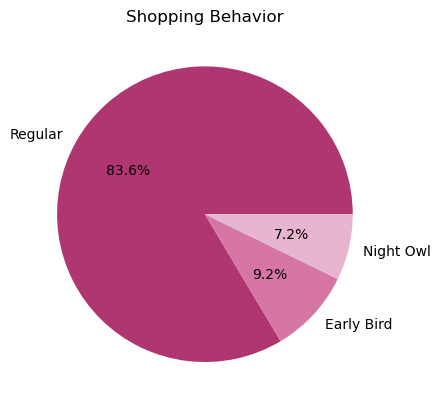

In [29]:
# Create pie chart with labels and color
behavior_pie = plt.pie(behavior_counts,labels = behavior_counts.index, autopct='%1.1f%%', colors=['#b03671', '#d576a4','#e8b5ce'])
# Add title
plt.title('Shopping Behavior')
# Save Pie Chart
plt.savefig( 'behavior_pie.png')

In [30]:
# Find min, max, and mean order numbers for each behavior
behavior_order_stats = instacart.groupby('shopping_behavior')['order_number'].agg(['min', 'max', 'mean'])

In [31]:
# View stats
behavior_order_stats

,min,max,mean
shopping_behavior,,,
Early Bird,1,99,19.338870
Night Owl,1,99,16.767266
Regular,1,99,16.932356


In [32]:
# Find the expenditure for each order for each customer
behavior_order_total = instacart.groupby(['shopping_behavior', 'user_id', 'order_number'])['prices'].sum().reset_index()

In [33]:
# View order expenditure stats
behavior_order_total

,shopping_behavior,user_id,order_number,prices
0,Early Bird,1,1,31.6
1,Early Bird,1,2,35.4
2,Early Bird,1,4,26.0
3,Early Bird,1,6,25.0
4,Early Bird,1,10,63.1
...,...,...,...,...
3214680,Regular,99999,27,159.7
3214681,Regular,99999,28,124.7
3214682,Regular,99999,29,30.5
3214683,Regular,99999,33,41.2


In [34]:
# Find the expenditure statistics for each customer
behavior_shopper_total = behavior_order_total.groupby(['shopping_behavior', 'user_id'])['prices'].agg(['min', 'max', 'mean']).reset_index()

In [35]:
# View the expenditure statistics for each customer
behavior_shopper_total

,shopping_behavior,user_id,min,max,mean
0,Early Bird,1,25.0,63.1,36.220000
1,Early Bird,10000,11.8,272.3,140.345455
2,Early Bird,100000,44.9,247.4,126.500000
3,Early Bird,100001,22.0,165.0,87.900000
4,Early Bird,100003,130.9,130.9,130.900000
...,...,...,...,...,...
380622,Regular,99995,42.6,132.5,79.580000
380623,Regular,99996,2.8,127.1,75.118182
380624,Regular,99997,31.6,145.5,95.500000
380625,Regular,99998,20.8,51.2,38.020000


In [36]:
# Find the expenditure statistics for each behavior flag
behavior_price_stats = behavior_shopper_total.groupby('shopping_behavior').agg({'min':'min', 'max':'max', 'mean':'mean'}).reset_index()

In [37]:
# View expenditure statistics for each behavior flag
behavior_price_stats

,shopping_behavior,min,max,mean
0,Early Bird,1.0,100275.7,127.692072
1,Night Owl,1.0,100290.2,122.828686
2,Regular,1.0,100452.9,126.661767


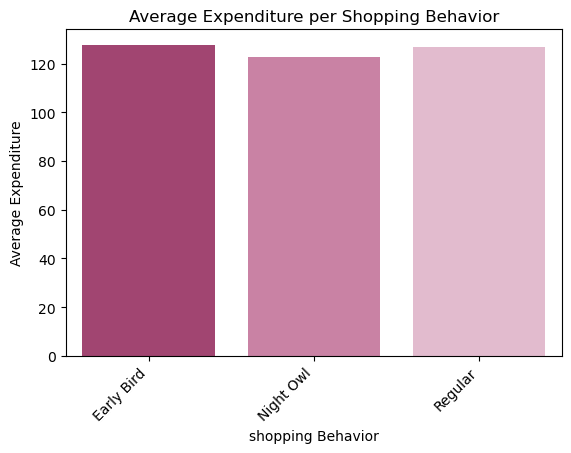

In [38]:
# Create bar chart for average order expense per shopping behavior
# Create table with average order expense
behavior_price_bar = sns.barplot(x= 'shopping_behavior', y = 'mean', data = behavior_price_stats, palette = ['#b03671', '#d576a4','#e8b5ce'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Add axis and title labels
plt.xlabel('shopping Behavior')
plt.ylabel('Average Expenditure')
plt.title('Average Expenditure per Shopping Behavior')
# Add x tick labels, position adjusted
plt.xticks(rotation = 45, ha = 'right')
# Save Bar Chart
plt.savefig( 'behavior_price_bar.png')

In [39]:
# Create a crosstable with shopping behavior and department id
behavior_dep_cross = pd.crosstab(instacart['department_id'],instacart['shopping_behavior'], dropna = False)

In [40]:
# View crosstable
behavior_dep_cross

shopping_behavior,Early Bird,Night Owl,Regular
department_id,,,
1,187469,163765,1883509
2,3154,2582,30555
3,111607,78883,981938
4,893539,729649,7856103
5,8351,5755,139590
6,21936,20081,227236
7,239403,172382,2276338
8,8292,6319,83105
9,75871,63823,726933


In [41]:
# Create long table to use for clustered bar graph
dep_behavior_long = behavior_dep_cross.reset_index().melt(id_vars='department_id', var_name='shopping_behavior', value_name='count')

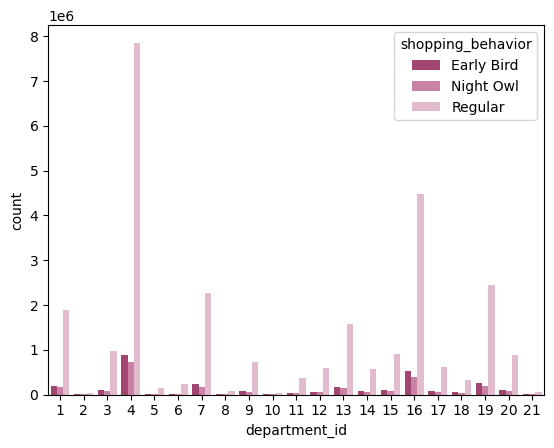

In [42]:
# Create clustered bar graph for shopping behavior and department
dep_beh_bar = sns.barplot(x = 'department_id', y = 'count', hue = 'shopping_behavior', data = dep_behavior_long, palette = ['#b03671', '#d576a4','#e8b5ce'])

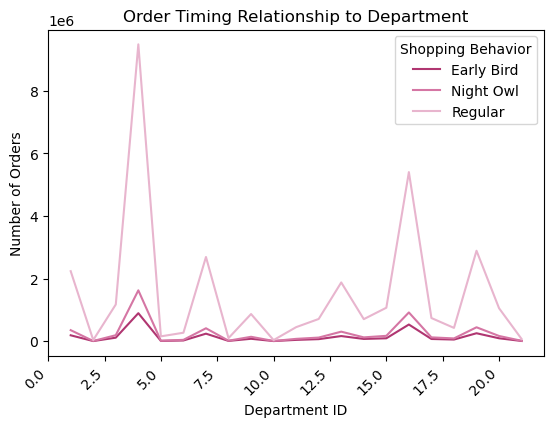

In [43]:
# Create stacked line chart for number of orders per department per shopping behavior with color
beh_dep_line = behavior_dep_cross.plot(kind = 'line', stacked = True, color = ['#b03671', '#d576a4','#e8b5ce'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Add axis and title labels
plt.title('Order Timing Relationship to Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
# Add x tick mark labels, position adjusted
plt.xticks(rotation = 45, ha = 'right')
# Add legend title
plt.legend(title = 'Shopping Behavior')
# Save Stacked Line Chart
plt.savefig( 'behavior_dep_bar.png')

In [44]:
# Create crosstab with shopping behavior, region, and department
behavior_reg_dep_cross = pd.crosstab(index = [instacart['Region'], instacart['shopping_behavior']],
                                    columns = instacart['department_id'], dropna = False)

In [45]:
# View crosstable
behavior_reg_dep_cross

department_id                    1      2       3        4      5      6   \
Region    shopping_behavior                                                 
Midwest   Early Bird          43526    757   25942   206995   1951   5119   
          Night Owl           38992    613   18825   172218   1247   4804   
          Regular            441578   7050  229102  1848724  32988  53813   
Northeast Early Bird          32070    567   19912   156973   1413   3811   
          Night Owl           29336    452   14242   131486   1021   3394   
          Regular            329512   5566  174445  1377380  24108  39686   
South     Early Bird          64185   1043   37631   302465   2885   7374   
          Night Owl           54598    894   26014   243053   2020   6821   
          Regular            629117  10275  325170  2615033  46719  74947   
West      Early Bird          47688    787   28122   227106   2102   5632   
          Night Owl           40839    623   19802   182892   1467   5062   
          Regular            483302   7664  253221  2014966  35775  58790   

department_id                    7      8       9     10  ...      12      13  \
Region    shopping_behavior                               ...                   
Midwest   Early Bird          55226   1787   17558   747  ...   14757   38216   
          Night Owl           40364   1700   15085   644  ...   11841   33235   
          Regular            529984  18868  171126  6802  ...  139531  370650   
Northeast Early Bird          43529   1765   13306   571  ...   11302   28181   
          Night Owl           32230   1124   11350   466  ...    9064   24865   
          Regular            407659  15712  127160  4765  ...  104254  276399   
South     Early Bird          80897   2575   25668  1050  ...   21845   54928   
          Night Owl           57485   1812   21056   879  ...   16794   47086   
          Regular            760558  26882  240720  9604  ...  197113  520422   
West      Early Bird          59751   2165   19339   764  ...   16510   41580   
          Night Owl           42303   1683   16332   724  ...   12532   35515   
          Regular            578137  21643  187927  7557  ...  153384  404292   

department_id                    14      15       16      17      18      19  \
Region    shopping_behavior                                                    
Midwest   Early Bird          16407   21294   123708   16297   11729   59088   
          Night Owl           11700   18723    91031   12507    8736   44147   
          Regular            135444  210685  1049484  147020   78518  570480   
Northeast Early Bird          13180   16170    95697   12383    9489   45231   
          Night Owl            8765   13861    69200    9084    6359   34691   
          Regular            101629  156724   789129  110018   59291  434753   
South     Early Bird          23332   30803   177657   22988   17865   84209   
          Night Owl           16603   26011   127630   17031   12383   64034   
          Regular            194316  299201  1491682  203051  113406  809103   
West      Early Bird          18304   23397   134496   17979   12496   64301   
          Night Owl           12803   19938    97620   13313    8541   47579   
          Regular            150550  231251  1151413  156995   84989  629934   

department_id                    20     21  
Region    shopping_behavior                 
Midwest   Early Bird          21329   1496  
          Night Owl           17364   1295  
          Regular            206985  13744  
Northeast Early Bird          16371   1093  
          Night Owl           13323    989  
          Regular            157123  10292  
South     Early Bird          31075   2093  
          Night Owl           24135   1786  
          Regular            294209  19314  
West      Early Bird          23231   1463  
          Night Owl           18621   1321  
          Regular            227483  14259  

[12 rows x 21 columns]

In [46]:
# Create a crosstable with shopping behavior and region
reg_behavior_cross = pd.crosstab(instacart['Region'], instacart['shopping_behavior'])

In [47]:
# View crosstable
reg_behavior_cross

shopping_behavior,Early Bird,Night Owl,Regular
Region,,,
Midwest,693568,552760,6350997
Northeast,530234,420857,4771645
South,1006323,779188,9006374
West,757501,587740,6947672


In [48]:
# Create long table for clustered bar graph
reg_behavior_long = reg_behavior_cross.reset_index().melt(id_vars = 'Region', var_name = 'shopping_behavior', value_name = 'count')

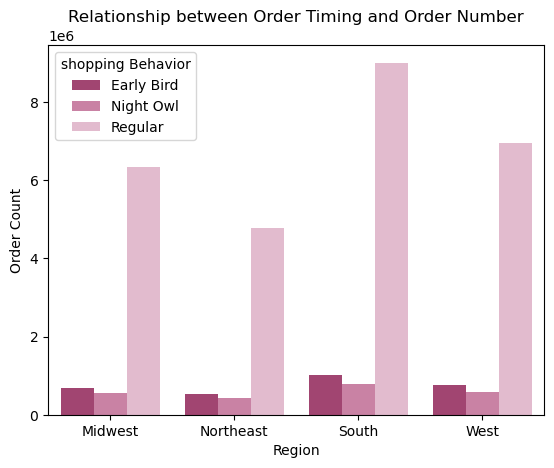

In [49]:
# Create clustered bar graph for region and shopping behavior
reg_beh_bar = sns.barplot(x = 'Region', y = 'count', hue = 'shopping_behavior', data = reg_behavior_long, palette = ['#b03671', '#d576a4','#e8b5ce'])

# Add axis, title, and legend labels
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.title('Relationship between Order Timing and Order Number')
plt.legend(title = 'shopping Behavior')
# Save Clustered Bar Graph
plt.savefig('behavior_region_bar.png')

In [50]:
# Find statistics for customer incomes
instacart['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [51]:
# Set the lifestyle flag for single, low-income
# Low-income at or below 30k
# Making the assumption that those living with parents and siblings are single
instacart.loc[(instacart['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])) & (instacart['income'] <= 30000), 'lifestyle'] = 'Single, Low-income'

In [52]:
# Set the lifestyle flag for single, middle-income
# Middle-income set between 30k and 80k
instacart.loc[(instacart['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])) & (instacart['income'] > 30000) & (instacart['income'] <= 80000), 'lifestyle'] = 'Single, Middle-income'

In [53]:
# Set the lifestyle flag for single, high-income
# High-income set above 80k
instacart.loc[(instacart['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])) & (instacart['income'] > 80000), 'lifestyle'] = 'Single, High-income'

In [54]:
# Set the lifestyle flag for married, low-income
# Low-income at or below 60k
instacart.loc[(instacart['marital_status'] == 'married') & (instacart['income'] <= 60000), 'lifestyle'] = 'Married, Low-income'

In [55]:
# Set the lifestyle flag for married, middle-income
# Middle-income set between 60k and 160k
instacart.loc[(instacart['marital_status'] == 'married') & (instacart['income'] > 60000) & (instacart['income'] <= 160000), 'lifestyle'] = 'Married, Middle-income'

In [56]:
# Set the lifestyle flag for married, high-income
# High-income set above 160k
instacart.loc[(instacart['marital_status'] == 'married') & (instacart['income'] > 160000), 'lifestyle'] = 'Married, High-income'

In [57]:
# Find value counts for lifestyle flag to check complete assignment
instacart['lifestyle'].value_counts(dropna = False)

lifestyle
Married, Middle-income    16987834
Single, High-income        5705569
Married, Low-income        4137146
Single, Middle-income      3865847
Married, High-income       1631773
Single, Low-income           76690
Name: count, dtype: int64

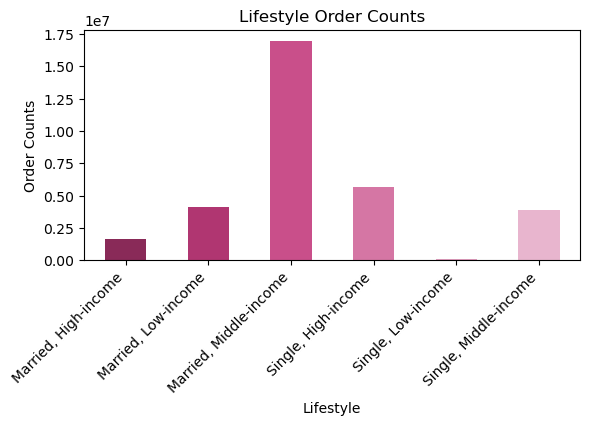

In [58]:
# Create bar graph for lifestyle flag
lifestyle_bar = instacart['lifestyle'].value_counts().sort_index().plot.bar(color = ['#892a58','#b03671','#c94f8a','#d576a4','#e19dbe','#e8b5ce'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.4)
# Add axis, title labels
plt.xlabel('Lifestyle')
plt.ylabel('Order Counts')
plt.title('Lifestyle Order Counts')
# Add x tick labels, position adjusted
plt.xticks(rotation = 45, ha = 'right')
# Save Bar Graph
plt.savefig( 'lifestyle_order_bar.png')

In [59]:
# Calculate statistics for lifestyle flag
lifestyle_order_stats = instacart.groupby('lifestyle')['order_number'].agg(['min','max','mean'])

In [60]:
# View table
lifestyle_order_stats

,min,max,mean
lifestyle,,,
"Married, High-income",1,99,17.650932
"Married, Low-income",1,99,16.380485
"Married, Middle-income",1,99,17.206611
"Single, High-income",1,99,17.395931
"Single, Low-income",1,99,14.434907
"Single, Middle-income",1,99,17.139695


In [61]:
# Find the expenditure for each customer for each order
lifestyle_order_totals = instacart.groupby(['lifestyle', 'user_id', 'order_number'])['prices'].sum().reset_index()

In [62]:
# View the order expenditures
lifestyle_order_totals

,lifestyle,user_id,order_number,prices
0,"Married, High-income",100018,1,66.2
1,"Married, High-income",100018,2,143.1
2,"Married, High-income",100018,3,32.5
3,"Married, High-income",100018,4,29.2
4,"Married, High-income",100018,5,58.2
...,...,...,...,...
3214680,"Single, Middle-income",99993,19,72.2
3214681,"Single, Middle-income",99993,20,81.4
3214682,"Single, Middle-income",99993,21,60.7
3214683,"Single, Middle-income",99993,22,75.8


In [63]:
# Find the expenditure statistics for each customer
lifestyle_shopper_total = lifestyle_order_totals.groupby(['lifestyle','user_id',])['prices'].agg(['min','max','mean']).reset_index()

In [64]:
# View the expenditure statistics for each customer
lifestyle_shopper_total

,lifestyle,user_id,min,max,mean
0,"Married, High-income",100018,7.5,143.1,54.053846
1,"Married, High-income",100051,17.5,160.6,83.807143
2,"Married, High-income",100140,41.4,127.7,78.866667
3,"Married, High-income",100146,21.8,431.5,248.470000
4,"Married, High-income",100156,57.0,99.4,81.814286
...,...,...,...,...,...
206204,"Single, Middle-income",9995,11.2,187.6,71.462500
206205,"Single, Middle-income",99955,3.7,142.2,52.710309
206206,"Single, Middle-income",99974,47.5,148.1,111.477778
206207,"Single, Middle-income",99981,12.8,118.6,61.733333


In [65]:
# Find the expenditure statistics for each flag
lifestyle_price_stats = lifestyle_shopper_total.groupby('lifestyle').agg({'min':'min','max':'max','mean':'mean'}).reset_index()

In [66]:
# View the expenditure statistics for each flag
lifestyle_price_stats

,lifestyle,min,max,mean
0,"Married, High-income",1.0,100452.9,618.788015
1,"Married, Low-income",1.0,15189.9,56.847248
2,"Married, Middle-income",1.0,100330.2,107.326228
3,"Single, High-income",1.0,100384.5,176.576562
4,"Single, Low-income",1.0,712.0,47.127179
5,"Single, Middle-income",1.0,15045.1,70.154454


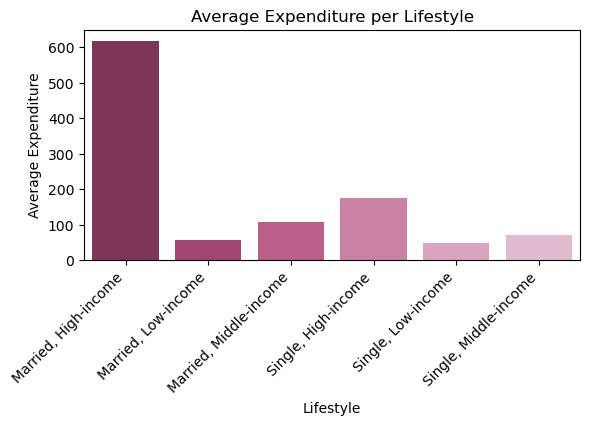

In [67]:
# Create bar graph for average order expenditure per lifestyle
lifestyle_price_bar = sns.barplot(x = 'lifestyle', y = 'mean', data = lifestyle_price_stats, palette = ['#892a58','#b03671','#c94f8a','#d576a4','#e19dbe','#e8b5ce'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.4)
# Add axis labels
plt.xlabel('Lifestyle')
plt.ylabel('Average Expenditure')
plt.title('Average Expenditure per Lifestyle')
# Add x tick labels, position adjusted
plt.xticks(rotation = 45, ha = 'right')
# Save Bar Graph
plt.savefig( 'lifestyle_spend_bar.png')

In [68]:
# Create crosstable for lifestyle and region
lifestyle_reg_cross = pd.crosstab(instacart['Region'], instacart['lifestyle'], dropna = False)

In [69]:
# View crosstable
lifestyle_reg_cross

lifestyle,"Married, High-income","Married, Low-income","Married, Middle-income","Single, High-income","Single, Low-income","Single, Middle-income"
Region,,,,,,
Midwest,392297,965355,3967956,1361313,20680,889724
Northeast,293544,725290,3017487,992904,11314,682197
South,538233,1400520,5621889,1893507,25316,1312420
West,407699,1045981,4380502,1457845,19380,981506


In [70]:
# Create long table for clustered bar graph
reg_lifestyle_long = lifestyle_reg_cross.reset_index().melt(id_vars = 'Region', var_name = 'lifestyle', value_name = 'count')

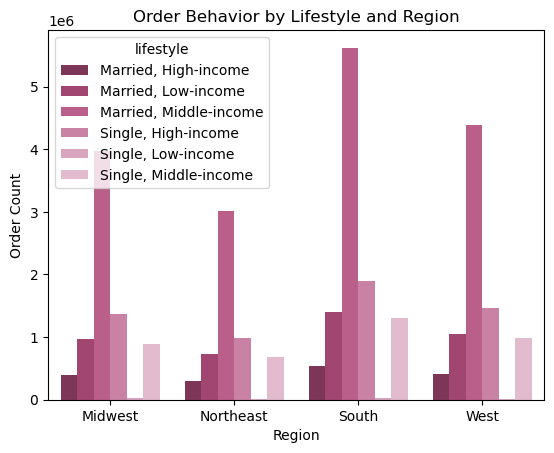

In [71]:
# Create clustered bar graph for region and lifestyle
reg_life_bar = sns.barplot(x = 'Region', y = 'count', hue = 'lifestyle', data = reg_lifestyle_long, palette = ['#892a58','#b03671','#c94f8a','#d576a4','#e19dbe','#e8b5ce'])
# Add axis, legend, and title labels
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.title('Order Behavior by Lifestyle and Region')
# Save Clustered Bar Graph
plt.savefig( 'lifestyle_region_bar.png')

In [72]:
shopping_behavior_bar.figure.savefig('shopping_behavior_bar.png')

In [73]:
dep_beh_bar.figure.savefig( 'department_behavior_bar.png')

In [74]:
instacart.to_pickle( 'instacart.pkl')

In [75]:
behavior_table = instacart['shopping_behavior'].value_counts()

In [76]:
behavior_table.to_clipboard()

In [77]:
lifestyle_table = instacart['lifestyle'].value_counts()

In [78]:
lifestyle_table.to_clipboard()

In [79]:
price_range_table = instacart['prices'].value_counts()

In [80]:
price_range_table.to_clipboard()

In [84]:
busiest_table = instacart['busiest_days'].value_counts()

In [85]:
busiest_table.to_clipboard()

In [86]:
busiest_period_table = instacart['busiest_period_of_day'].value_counts()

In [87]:
busiest_period_table.to_clipboard()

In [88]:
loyalty_table = instacart['loyalty_flag'].value_counts()

In [89]:
loyalty_table.to_clipboard()

In [90]:
spending_table = instacart['spender_flag'].value_counts()

In [91]:
spending_table.to_clipboard()

In [92]:
frequency_table = instacart['frequency_flag'].value_counts()

In [93]:
frequency_table.to_clipboard()